In [117]:
# imports
import pandas as pd
import geopandas as gpd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import linregress, pearsonr, spearmanr

# no max rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [118]:
# load in node ids, crash avg, census tract ids
node_info = pd.read_csv("/Users/elizabethpysher/spoke/data/DUMMY_CRASH_AVG_FOR_CORRELATION_TESTS_node_id_census_tract_key.csv")

node_info.head()

,Unnamed: 0,CRASH_AVG,NODE_ID,CENSUS_TRACT_ID
0,0,0.000000,42421828,2800
1,1,0.000000,42421837,2800
2,27,0.000272,42421877,6300
3,52,0.000032,42421889,7100
4,72,0.000000,42421927,5502


In [119]:
# load in census race and income data
race_income = pd.read_csv('/Users/elizabethpysher/spoke/data/census_race_income_clean.csv')

# load in census transportation and departure time data
transp_depart = pd.read_csv('/Users/elizabethpysher/spoke/data/census_transportation_departure_time_clean.csv')

race_income.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,CENSUS_TRACT,RACE_TOTAL,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,HISPANIC,INCOME_TOTAL,LESS_THAN_10000,100000_TO_124999,125000_TO_149999,150000_TO_199999,200000_OR_MORE,10000_TO_24999,25000_TO_49999,50000_TO_99999,WHITE_PERCENT,BLACK_PERCENT,AMERICAN_INDIAN_PERCENT,ASIAN_PERCENT,HISPANIC_PERCENT,LESS_THAN_10000_PERCENT,100000_TO_124999_PERCENT,125000_TO_149999_PERCENT,150000_TO_199999_PERCENT,200000_OR_MORE_PERCENT,10000_TO_24999_PERCENT,25000_TO_49999_PERCENT,50000_TO_99999_PERCENT
0,0,1,1009800,Manhattan,I,9800,98.0,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200306,POLYGON ((-73.96432543478758 40.75638153099091...,9800,7302,5510,153,10,791,718,4242,136,249,252,347,1585,475,308,890,75.458778,2.095316,0.136949,10.832649,9.832922,3.206035,5.869873,5.940594,8.180104,37.364451,11.197548,7.260726,20.980669
1,1,1,1010200,Manhattan,I,10200,102.0,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...,10200,122,67,7,28,2,14,66,5,8,18,0,4,26,0,5,54.918033,5.737705,22.950820,1.639344,11.475410,7.575758,12.121212,27.272727,0.000000,6.060606,39.393939,0.000000,7.575758
2,2,1,1010400,Manhattan,I,10400,104.0,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...,10400,811,511,12,0,156,73,522,22,76,53,41,173,42,20,95,63.008631,1.479655,0.000000,19.235512,9.001233,4.214559,14.559387,10.153257,7.854406,33.141762,8.045977,3.831418,18.199234
3,3,1,1011300,Manhattan,I,11300,113.0,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860712,"POLYGON ((-73.98411754823195 40.7548420534646,...",11300,98,15,38,0,33,0,53,11,5,10,5,3,0,7,12,15.306122,38.775510,0.000000,33.673469,0.000000,20.754717,9.433962,18.867925,9.433962,5.660377,0.000000,13.207547,22.641509
4,4,1,1013000,Manhattan,I,13000,130.0,MN40,Upper East Side-Carnegie Hill,3805,1.918145e+06,5807.972956,POLYGON ((-73.96147581181627 40.77432401139124...,13000,3314,2894,20,0,144,181,1789,24,102,17,159,893,50,192,352,87.326494,0.603500,0.000000,4.345202,5.461678,1.341532,5.701509,0.950252,8.887647,49.916154,2.794857,10.732253,19.675797


In [120]:
transp_depart.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,CENSUS_TRACT,TRANSP_TOTAL,CAR,BUS,SUBWAY,TRAIN_RAIL,TROLLEY,FERRY,TAXI,MOTORCYCLE,BICYCLE,WALKED,TRANSP_OTHER,WORKED_FROM_HOME,DEPART_TOTAL,12AM_4:59AM,5AM_5:29AM,5:30AM_5:59AM,6AM_6:29AM,6:30AM_6:59AM,7AM_7:29AM,7:30AM_7:59AM,8AM_8:29AM,8:30AM_8:59AM,9AM_9:59AM,10AM_10:59AM,11AM_11:59AM,12PM_3:59PM,4PM_11:59PM,CAR_PERCENT,BUS_PERCENT,SUBWAY_PERCENT,TRAIN_RAIL_PERCENT,TROLLEY_PERCENT,FERRY_PERCENT,TAXI_PERCENT,MOTORCYCLE_PERCENT,BICYCLE_PERCENT,WALKED_PERCENT,TRANSP_OTHER_PERCENT,WORKED_FROM_HOME_PERCENT,12AM_4:59AM_PERCENT,5AM_5:29AM_PERCENT,5:30AM_5:59AM_PERCENT,6AM_6:29AM_PERCENT,6:30AM_6:59AM_PERCENT,7AM_7:29AM_PERCENT,7:30AM_7:59AM_PERCENT,8AM_8:29AM_PERCENT,8:30AM_8:59AM_PERCENT,9AM_9:59AM_PERCENT,10AM_10:59AM_PERCENT,11AM_11:59AM_PERCENT,12PM_3:59PM_PERCENT,4PM_11:59PM_PERCENT
0,0,1,1009800,Manhattan,I,9800,98.0,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200306,POLYGON ((-73.96432543478758 40.75638153099091...,9800,4557,375,20,1389,52,0,8,24,0,19,2068,21,581,3976,18,66,30,0,130,306,297,1140,909,790,33,49,63,145,8.229098,0.438885,30.480579,1.141102,0.0,0.175554,0.526662,0.0,0.416941,45.380733,0.460829,12.749616,0.452716,1.65996,0.754527,0.000000,3.269618,7.696177,7.469819,28.672032,22.862173,19.869215,0.829980,1.232394,1.584507,3.646881
1,1,1,1010200,Manhattan,I,10200,102.0,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...,10200,63,7,2,14,0,0,0,0,0,4,18,4,14,49,0,0,0,0,0,8,4,3,9,10,0,2,4,9,11.111111,3.174603,22.222222,0.000000,0.0,0.000000,0.000000,0.0,6.349206,28.571429,6.349206,22.222222,0.000000,0.00000,0.000000,0.000000,0.000000,16.326531,8.163265,6.122449,18.367347,20.408163,0.000000,4.081633,8.163265,18.367347
2,2,1,1010400,Manhattan,I,10400,104.0,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550224 40.76229308352487...,10400,569,10,5,211,0,0,5,0,0,1,244,0,93,476,0,0,0,18,0,21,58,78,143,137,0,13,8,0,1.757469,0.878735,37.082601,0.000000,0.0,0.878735,0.000000,0.0,0.175747,42.882250,0.000000,16.344464,0.000000,0.00000,0.000000,3.781513,0.000000,4.411765,12.184874,16.386555,30.042017,28.781513,0.000000,2.731092,1.680672,0.000000
3,3,1,1011300,Manhattan,I,11300,113.0,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860712,"POLYGON ((-73.98411754823195 40.7548420534646,...",11300,51,0,0,17,0,0,0,0,0,0,34,0,0,51,0,0,0,3,0,0,0,9,13,18,5,3,0,0,0.000000,0.000000,33.333333,0.000000,0.0,0.000000,0.000000,0.0,0.000000,66.666667,0.000000,0.000000,0.000000,0.00000,0.000000,5.882353,0.000000,0.000000,0.000000,17.647059,25.490196,35.294118,9.803922,5.882353,0.000000,0.000000
4,4,1,1013000,Manhattan,I,13000,130.0,MN40,Upper East Side-Carnegie Hill,3805,1.918145e+06,5807.972956,POLYGON ((-73.96147581181627 40.77432401139124...,13000,1546,291,219,365,25,0,0,140,0,16,320,68,102,1444,0,24,16,12,35,120,179,298,339,217,95,53,56,0,18.822768,14.165589,23.609314,1.617076,0.0,0.000000,9.055627,0.0,1.034929,20.698577,4.398448,6.597671,0.000000,1.66205,1.108033,0.831025,2.423823,8.310249,12.396122,20.637119,23.476454,15.027701,6.578947,3.670360,3.878116,0.000000


In [121]:
# join on census tract ID
node_crash_race_income = node_info.merge(race_income, how='left', left_on='CENSUS_TRACT_ID',right_on='CENSUS_TRACT')
node_crash_transp_depart = node_info.merge(transp_depart, how='left', left_on='CENSUS_TRACT_ID',right_on='CENSUS_TRACT')


# check shape
print("race & income shape: ",node_crash_race_income.shape)
print("transportation & departure time shape: ",node_crash_transp_depart.shape)

race & income shape:  (2072, 46)
transportation & departure time shape:  (2072, 72)


In [122]:
# examine head
node_crash_race_income.head()

,Unnamed: 0_x,CRASH_AVG,NODE_ID,CENSUS_TRACT_ID,Unnamed: 0_y,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,CENSUS_TRACT,RACE_TOTAL,WHITE,BLACK,AMERICAN_INDIAN,ASIAN,HISPANIC,INCOME_TOTAL,LESS_THAN_10000,100000_TO_124999,125000_TO_149999,150000_TO_199999,200000_OR_MORE,10000_TO_24999,25000_TO_49999,50000_TO_99999,WHITE_PERCENT,BLACK_PERCENT,AMERICAN_INDIAN_PERCENT,ASIAN_PERCENT,HISPANIC_PERCENT,LESS_THAN_10000_PERCENT,100000_TO_124999_PERCENT,125000_TO_149999_PERCENT,150000_TO_199999_PERCENT,200000_OR_MORE_PERCENT,10000_TO_24999_PERCENT,25000_TO_49999_PERCENT,50000_TO_99999_PERCENT
0,0,0.000000,42421828,2800,167,1,1002800,Manhattan,E,2800,28.00,MN28,Lower East Side,3809,1.973678e+06,5627.555017,POLYGON ((-73.97329796772085 40.72742800885976...,2800,6765,2234,1080,0,1037,2289,3385,471,168,149,177,392,751,672,605,33.022912,15.964523,0.0,15.328899,33.835920,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969
1,1,0.000000,42421837,2800,167,1,1002800,Manhattan,E,2800,28.00,MN28,Lower East Side,3809,1.973678e+06,5627.555017,POLYGON ((-73.97329796772085 40.72742800885976...,2800,6765,2234,1080,0,1037,2289,3385,471,168,149,177,392,751,672,605,33.022912,15.964523,0.0,15.328899,33.835920,13.914328,4.963072,4.401773,5.228951,11.580502,22.186115,19.852290,17.872969
2,27,0.000272,42421877,6300,95,1,1006300,Manhattan,I,6300,63.00,MN23,West Village,3810,1.918266e+06,5802.508440,POLYGON ((-73.99361688329428 40.73600449161599...,6300,6393,5359,67,0,435,300,3359,172,250,334,407,1398,160,219,419,83.826060,1.048021,0.0,6.804317,4.692633,5.120572,7.442691,9.943436,12.116701,41.619530,4.763322,6.519798,12.473951
3,52,0.000032,42421889,7100,144,1,1007100,Manhattan,I,7100,71.00,MN23,West Village,3810,1.775764e+06,6601.177174,"POLYGON ((-73.9968399392649 40.7373608893982, ...",7100,5530,4554,191,0,342,217,3111,53,366,171,488,1208,154,275,396,82.350814,3.453888,0.0,6.184448,3.924051,1.703632,11.764706,5.496625,15.686275,38.829958,4.950177,8.839601,12.729026
4,72,0.000000,42421927,5502,252,1,1005502,Manhattan,I,5502,55.02,MN23,West Village,3810,1.243017e+06,4547.016128,POLYGON ((-73.99155207579066 40.72709433672387...,5502,1825,1503,59,0,41,134,969,49,183,109,88,312,56,14,158,82.356164,3.232877,0.0,2.246575,7.342466,5.056760,18.885449,11.248710,9.081527,32.198142,5.779154,1.444788,16.305470


In [123]:
# examine head
node_crash_transp_depart.head()

,Unnamed: 0_x,CRASH_AVG,NODE_ID,CENSUS_TRACT_ID,Unnamed: 0_y,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,CENSUS_TRACT,TRANSP_TOTAL,CAR,BUS,SUBWAY,TRAIN_RAIL,TROLLEY,FERRY,TAXI,MOTORCYCLE,BICYCLE,WALKED,TRANSP_OTHER,WORKED_FROM_HOME,DEPART_TOTAL,12AM_4:59AM,5AM_5:29AM,5:30AM_5:59AM,6AM_6:29AM,6:30AM_6:59AM,7AM_7:29AM,7:30AM_7:59AM,8AM_8:29AM,8:30AM_8:59AM,9AM_9:59AM,10AM_10:59AM,11AM_11:59AM,12PM_3:59PM,4PM_11:59PM,CAR_PERCENT,BUS_PERCENT,SUBWAY_PERCENT,TRAIN_RAIL_PERCENT,TROLLEY_PERCENT,FERRY_PERCENT,TAXI_PERCENT,MOTORCYCLE_PERCENT,BICYCLE_PERCENT,WALKED_PERCENT,TRANSP_OTHER_PERCENT,WORKED_FROM_HOME_PERCENT,12AM_4:59AM_PERCENT,5AM_5:29AM_PERCENT,5:30AM_5:59AM_PERCENT,6AM_6:29AM_PERCENT,6:30AM_6:59AM_PERCENT,7AM_7:29AM_PERCENT,7:30AM_7:59AM_PERCENT,8AM_8:29AM_PERCENT,8:30AM_8:59AM_PERCENT,9AM_9:59AM_PERCENT,10AM_10:59AM_PERCENT,11AM_11:59AM_PERCENT,12PM_3:59PM_PERCENT,4PM_11:59PM_PERCENT
0,0,0.000000,42421828,2800,167,1,1002800,Manhattan,E,2800,28.00,MN28,Lower East Side,3809,1.973678e+06,5627.555017,POLYGON ((-73.97329796772085 40.72742800885976...,2800,3272,207,597,1532,27,0,0,30,0,261,533,0,85,3187,0,12,27,78,180,367,249,681,541,520,229,67,84,152,6.326406,18.245721,46.821516,0.825183,0.0,0.0,0.916870,0.0,7.976773,16.289731,0.000000,2.597800,0.0,0.376530,0.847192,2.447443,5.647945,11.515532,7.812990,21.368058,16.975212,16.316285,7.185441,2.102291,2.635708,4.769376
1,1,0.000000,42421837,2800,167,1,1002800,Manhattan,E,2800,28.00,MN28,Lower East Side,3809,1.973678e+06,5627.555017,POLYGON ((-73.97329796772085 40.72742800885976...,2800,3272,207,597,1532,27,0,0,30,0,261,533,0,85,3187,0,12,27,78,180,367,249,681,541,520,229,67,84,152,6.326406,18.245721,46.821516,0.825183,0.0,0.0,0.916870,0.0,7.976773,16.289731,0.000000,2.597800,0.0,0.376530,0.847192,2.447443,5.647945,11.515532,7.812990,21.368058,16.975212,16.316285,7.185441,2.102291,2.635708,4.769376
2,27,0.000272,42421877,6300,95,1,1006300,Manhattan,I,6300,63.00,MN23,West Village,3810,1.918266e+06,5802.508440,POLYGON ((-73.99361688329428 40.73600449161599...,6300,3927,263,113,2016,17,0,0,187,0,73,802,39,417,3510,0,19,47,102,98,298,298,450,813,849,230,107,89,110,6.697224,2.877515,51.336898,0.432900,0.0,0.0,4.761905,0.0,1.858925,20.422715,0.993125,10.618793,0.0,0.541311,1.339031,2.905983,2.792023,8.490028,8.490028,12.820513,23.162393,24.188034,6.552707,3.048433,2.535613,3.133903
3,52,0.000032,42421889,7100,144,1,1007100,Manhattan,I,7100,71.00,MN23,West Village,3810,1.775764e+06,6601.177174,"POLYGON ((-73.9968399392649 40.7373608893982, ...",7100,3524,221,43,1696,36,0,0,143,0,198,843,47,297,3227,0,0,0,46,185,281,319,609,910,615,81,5,29,147,6.271283,1.220204,48.127128,1.021566,0.0,0.0,4.057889,0.0,5.618615,23.921680,1.333712,8.427923,0.0,0.000000,0.000000,1.425473,5.732879,8.707778,9.885342,18.872017,28.199566,19.057949,2.510071,0.154943,0.898667,4.555315
4,72,0.000000,42421927,5502,252,1,1005502,Manhattan,I,5502,55.02,MN23,West Village,3810,1.243017e+06,4547.016128,POLYGON ((-73.99155207579066 40.72709433672387...,5502,1088,10,63,482,7,0,0,43,0,55,298,12,118,970,0,0,8,0,59,19,110,188,221,211,52,11,31,60,0.919118,5.790441,44.301471,0.643382,0.0,0.0,3.952206,0.0,5.055147,27.389706,1.102941,10.845588,0.0,0.000000,0.824742,0.000000,6.082474,1.958763,11.340206,19.381443,22.783505,21.752577,5.360825,1.134021,3.195876,6.185567


In [124]:
# white percent test
fitted_model = sm.OLS.from_formula('CRASH_AVG ~ WHITE_PERCENT', data=node_crash_race_income).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CRASH_AVG   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.602
Date:                Tue, 23 Nov 2021   Prob (F-statistic):             0.0578
Time:                        11:22:35   Log-Likelihood:                 9480.8
No. Observations:                2063   AIC:                        -1.896e+04
Df Residuals:                    2061   BIC:                        -1.895e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0006      0.000      3.924      0.000       0.000       0.001
WHITE_PERCENT -4.538e-06   2.39e-06     -1.898      0.058   -9.23e-06    1.51e-07
==============================================================================
Omnibus:                     5080.028   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46548779.025
Skew:                          25.489   Prob(JB):                         0.00
Kurtosis:                     737.117   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

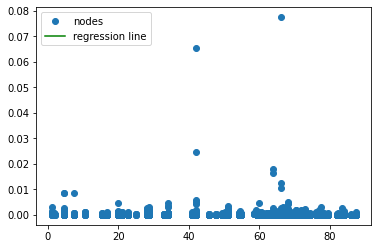

In [125]:
# white percent test
x_values = node_crash_race_income['WHITE_PERCENT']
y_values = node_crash_race_income['CRASH_AVG']

slope, intercept, _, _, _ = stats.linregress(x_values, y_values)


plt.plot(x_values, y_values, 'o', label='nodes')
plt.plot(x_values, intercept + slope*x_values, 'g', label='regression line')
plt.legend()
plt.show()

In [126]:
# income percent test
income_fitted_model = sm.OLS.from_formula('CRASH_AVG ~ LESS_THAN_10000_PERCENT', data=node_crash_race_income).fit()
income_fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CRASH_AVG   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.010
Date:                Tue, 23 Nov 2021   Prob (F-statistic):              0.315
Time:                        11:22:35   Log-Likelihood:                 9479.5
No. Observations:                2063   AIC:                        -1.896e+04
Df Residuals:                    2061   BIC:                        -1.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0003   8.86e-05      2.897      0.004     8.3e-05       0.000
LESS_THAN_10000_PERCENT  1.025e-05   1.02e-05      1.005      0.315   -9.75e-06    3.02e-05
==============================================================================
Omnibus:                     5078.736   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46439173.399
Skew:                          25.474   Prob(JB):                         0.00
Kurtosis:                     736.251   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

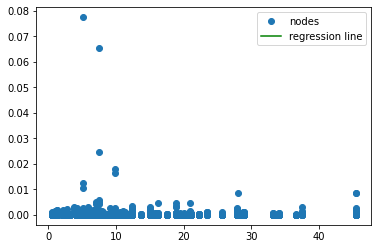

In [127]:
# income percent test
x_values = node_crash_race_income['10000_TO_24999_PERCENT']
y_values = node_crash_race_income['CRASH_AVG']

slope, intercept, _, _, _ = stats.linregress(x_values, y_values)


plt.plot(x_values, y_values, 'o', label='nodes')
plt.plot(x_values, intercept + slope*x_values, 'g', label='regression line')
plt.legend()
plt.show()

In [128]:
# look at tranportation mode and departure time columns
node_crash_transp_depart.columns

Index(['Unnamed: 0_x', 'CRASH_AVG', 'NODE_ID', 'CENSUS_TRACT_ID',
       'Unnamed: 0_y', 'boro_code', 'boro_ct201', 'boro_name', 'cdeligibil',
       'ct2010', 'ctlabel', 'ntacode', 'ntaname', 'puma', 'shape_area',
       'shape_leng', 'geometry', 'CENSUS_TRACT', 'TRANSP_TOTAL', 'CAR', 'BUS',
       'SUBWAY', 'TRAIN_RAIL', 'TROLLEY', 'FERRY', 'TAXI', 'MOTORCYCLE',
       'BICYCLE', 'WALKED', 'TRANSP_OTHER', 'WORKED_FROM_HOME', 'DEPART_TOTAL',
       '12AM_4:59AM', '5AM_5:29AM', '5:30AM_5:59AM', '6AM_6:29AM',
       '6:30AM_6:59AM', '7AM_7:29AM', '7:30AM_7:59AM', '8AM_8:29AM',
       '8:30AM_8:59AM', '9AM_9:59AM', '10AM_10:59AM', '11AM_11:59AM',
       '12PM_3:59PM', '4PM_11:59PM', 'CAR_PERCENT', 'BUS_PERCENT',
       'SUBWAY_PERCENT', 'TRAIN_RAIL_PERCENT', 'TROLLEY_PERCENT',
       'FERRY_PERCENT', 'TAXI_PERCENT', 'MOTORCYCLE_PERCENT',
       'BICYCLE_PERCENT', 'WALKED_PERCENT', 'TRANSP_OTHER_PERCENT',
       'WORKED_FROM_HOME_PERCENT', '12AM_4:59AM_PERCENT', '5AM_5:29AM_PERCENT',
    

In [129]:
# transportation mode percent test
transp_fitted_model = sm.OLS.from_formula('CRASH_AVG ~ BICYCLE_PERCENT', data=node_crash_transp_depart).fit()
transp_fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CRASH_AVG   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2239
Date:                Tue, 23 Nov 2021   Prob (F-statistic):              0.636
Time:                        11:22:35   Log-Likelihood:                 9479.1
No. Observations:                2063   AIC:                        -1.895e+04
Df Residuals:                    2061   BIC:                        -1.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0004   9.02e-05      4.009      0.000       0.000       0.001
BICYCLE_PERCENT -1.012e-05   2.14e-05     -0.473      0.636   -5.21e-05    3.18e-05
==============================================================================
Omnibus:                     5077.082   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46324662.896
Skew:                          25.453   Prob(JB):                         0.00
Kurtosis:                     735.345   Cond. No.                         7.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

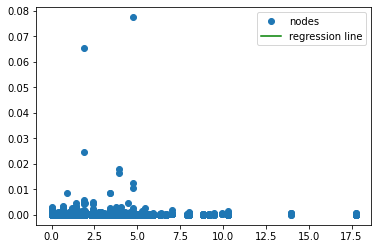

In [130]:
# transportation mode percent test
x_values = node_crash_transp_depart['BICYCLE_PERCENT']
y_values = node_crash_transp_depart['CRASH_AVG']

slope, intercept, _, _, _ = stats.linregress(x_values, y_values)


plt.plot(x_values, y_values, 'o', label='nodes')
plt.plot(x_values, intercept + slope*x_values, 'g', label='regression line')
plt.legend()
plt.show()

In [131]:
# departure time percent test
transp_fitted_model = sm.OLS.from_formula('CRASH_AVG ~ WORKED_FROM_HOME_PERCENT', data=node_crash_transp_depart).fit()
transp_fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CRASH_AVG   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     11.79
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           0.000608
Time:                        11:22:35   Log-Likelihood:                 9484.9
No. Observations:                2063   AIC:                        -1.897e+04
Df Residuals:                    2061   BIC:                        -1.895e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0007      0.000      5.805      0.000       0.000       0.001
WORKED_FROM_HOME_PERCENT -4.808e-05    1.4e-05     -3.433      0.001   -7.55e-05   -2.06e-05
==============================================================================
Omnibus:                     5073.259   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46183450.451
Skew:                          25.405   Prob(JB):                         0.00
Kurtosis:                     734.229   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

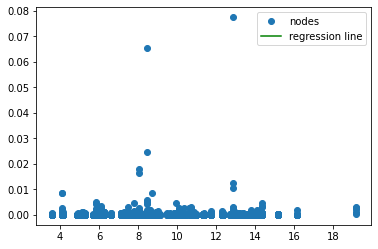

In [132]:
# departure time percent test
x_values = node_crash_transp_depart['7:30AM_7:59AM_PERCENT']
y_values = node_crash_transp_depart['CRASH_AVG']

slope, intercept, _, _, _ = stats.linregress(x_values, y_values)


plt.plot(x_values, y_values, 'o', label='nodes')
plt.plot(x_values, intercept + slope*x_values, 'g', label='regression line')
plt.legend()
plt.show()